# About Dataset

#### This dataset contains different collected datasets with crime data of the city of Los Angeles. 

By: Musinde Kabwoya

In [51]:
#Importing the neccessary modules and libraries. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
df = pd.read_csv("/kaggle/input/los-angeles-crime-data-from-2000/Crime_Data_from_2020_to_Present.csv")

# Section 1
# Data Explorarion to understand more about the dataset. 

In [52]:
df.head() #View the first 5 rows of the data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [53]:
df.shape #View the number of columns and rows in the dataset. 

(944235, 28)

In [54]:
print(df.columns) #View the columns in the dataset. 

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


# 1. Handling missing values

In [55]:
print(df.isna().sum())

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           133099
Vict Age               0
Vict Sex          126595
Vict Descent      126605
Premis Cd             10
Premis Desc          567
Weapon Used Cd    619758
Weapon Desc       619758
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          875977
Crm Cd 3          941954
Crm Cd 4          944171
LOCATION               0
Cross Street      796643
LAT                    0
LON                    0
dtype: int64


In [56]:
df_new = df.copy() #First creating a copy of the df

In [57]:
#Dropping unneccesary columns 
df_new.drop(['Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'Premis Desc', 'Mocodes', 'DR_NO'], axis=1, inplace=True)
df_new.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Cd,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,0,M,O,101.0,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,47,M,O,128.0,IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,19,X,X,502.0,IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002
3,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405.0,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,28,M,H,102.0,IC,Invest Cont,354.0,1900 TRANSIENT,34.0944,-118.3277


In [58]:
#Checking for the data types in each column
df_new.dtypes

Date Rptd        object
DATE OCC         object
TIME OCC          int64
AREA              int64
AREA NAME        object
Rpt Dist No       int64
Part 1-2          int64
Crm Cd            int64
Crm Cd Desc      object
Vict Age          int64
Vict Sex         object
Vict Descent     object
Premis Cd       float64
Status           object
Status Desc      object
Crm Cd 1        float64
LOCATION         object
LAT             float64
LON             float64
dtype: object

In [59]:
# Renaming the columns for better clarity and consistency to make the column names more descriptive and standardized 
df_new.rename(columns={
    'Date Rptd': 'Date_Reported',          
    'DATE OCC': 'Date_Occurred',           
    'TIME OCC': 'Time_Occurred',           
    'AREA': 'Area_Code',                   
    'AREA NAME': 'Area_Name',              
    'Rpt Dist No': 'Report_District_Number', 
    'Part 1-2': 'Part1_2_Indicator',       
    'Crm Cd': 'Crime_Code',               
    'Crm Cd Desc': 'Crime_Description',    
    'Vict Age': 'Victim_Age',              
    'Vict Sex': 'Victim_Sex',              
    'Vict Descent': 'Victim_Descent',      
    'Premis Cd': 'Premise_Code',          
    'Status': 'Status_Code',               
    'Status Desc': 'Status_Description',   
    'Crm Cd 1': 'Crime_Code_1',            
    'LOCATION': 'Location',                
    'LAT': 'Latitude',                     
    'LON': 'Longitude'                    
}, inplace=True)

# Verifing the changes to the column names. 
df_new.head()


,Date_Reported,Date_Occurred,Time_Occurred,Area_Code,Area_Name,Report_District_Number,Part1_2_Indicator,Crime_Code,Crime_Description,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Status_Code,Status_Description,Crime_Code_1,Location,Latitude,Longitude
0,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,0,M,O,101.0,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,47,M,O,128.0,IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,19,X,X,502.0,IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002
3,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405.0,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,28,M,H,102.0,IC,Invest Cont,354.0,1900 TRANSIENT,34.0944,-118.3277


In [60]:
#Checking for missing values in the data set. 
df_new.isna().sum()

Date_Reported                  0
Date_Occurred                  0
Time_Occurred                  0
Area_Code                      0
Area_Name                      0
Report_District_Number         0
Part1_2_Indicator              0
Crime_Code                     0
Crime_Description              0
Victim_Age                     0
Victim_Sex                126595
Victim_Descent            126605
Premise_Code                  10
Status_Code                    0
Status_Description             0
Crime_Code_1                  11
Location                       0
Latitude                       0
Longitude                      0
dtype: int64

In [62]:
#Filling in missing data in victim sex and descent with X(Unknown) as indicated in the data card. 
df_new = df_new.copy()
df_new['Victim_Sex'].fillna('X', inplace=True)
df_new['Victim_Descent'].fillna('X', inplace=True)

/tmp/ipykernel_847/2888837564.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['Victim_Sex'].fillna('X', inplace=True)
/tmp/ipykernel_847/2888837564.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [63]:
#Dropping rows with missing data. 
df_new = df_new.dropna()
df_new.isna().sum()

Date_Reported             0
Date_Occurred             0
Time_Occurred             0
Area_Code                 0
Area_Name                 0
Report_District_Number    0
Part1_2_Indicator         0
Crime_Code                0
Crime_Description         0
Victim_Age                0
Victim_Sex                0
Victim_Descent            0
Premise_Code              0
Status_Code               0
Status_Description        0
Crime_Code_1              0
Location                  0
Latitude                  0
Longitude                 0
dtype: int64

In [65]:
#Converting date columns to date-time data type. 
df_new['Date_Reported'] = pd.to_datetime(df_new['Date_Reported'].str.split().str[0], format='%m/%d/%Y')
df_new['Date_Occurred'] = pd.to_datetime(df_new['Date_Occurred'].str.split().str[0], format='%m/%d/%Y')
df_new.head()

,Date_Reported,Date_Occurred,Time_Occurred,Area_Code,Area_Name,Report_District_Number,Part1_2_Indicator,Crime_Code,Crime_Description,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Status_Code,Status_Description,Crime_Code_1,Location,Latitude,Longitude
0,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,0,M,O,101.0,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,47,M,O,128.0,IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,19,X,X,502.0,IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002
3,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405.0,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,28,M,H,102.0,IC,Invest Cont,354.0,1900 TRANSIENT,34.0944,-118.3277


# Exploratory Data Analysis
### 1. Crime Trends Over Time:

In [66]:
df_new.columns

Index(['Date_Reported', 'Date_Occurred', 'Time_Occurred', 'Area_Code',
       'Area_Name', 'Report_District_Number', 'Part1_2_Indicator',
       'Crime_Code', 'Crime_Description', 'Victim_Age', 'Victim_Sex',
       'Victim_Descent', 'Premise_Code', 'Status_Code', 'Status_Description',
       'Crime_Code_1', 'Location', 'Latitude', 'Longitude'],
      dtype='object')

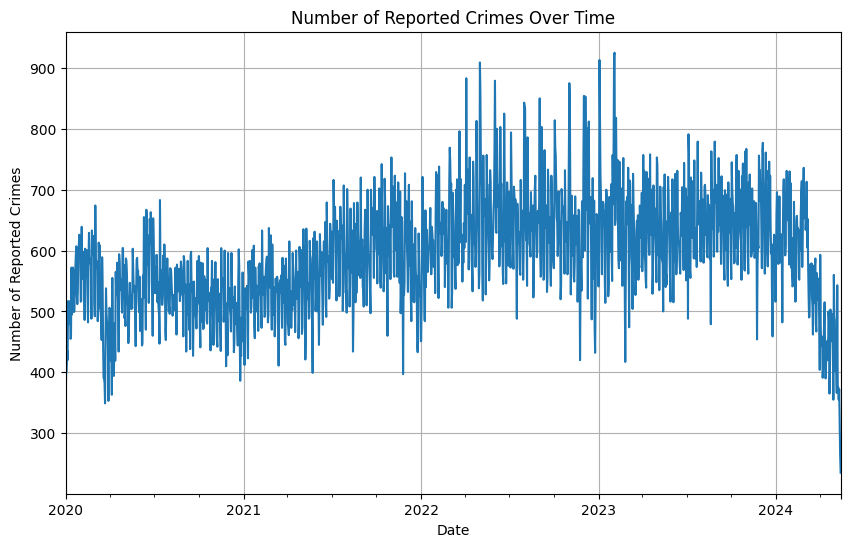

In [67]:
#Count of crime per year
crime_counts = df_new.groupby('Date_Reported').size()

plt.figure(figsize=(10, 6))
crime_counts.plot()
plt.title('Number of Reported Crimes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reported Crimes')
plt.grid(True)
plt.show()

# Observations
1. There were many incidences of crimes reported between 2022 and 2023 compared to the other years.  

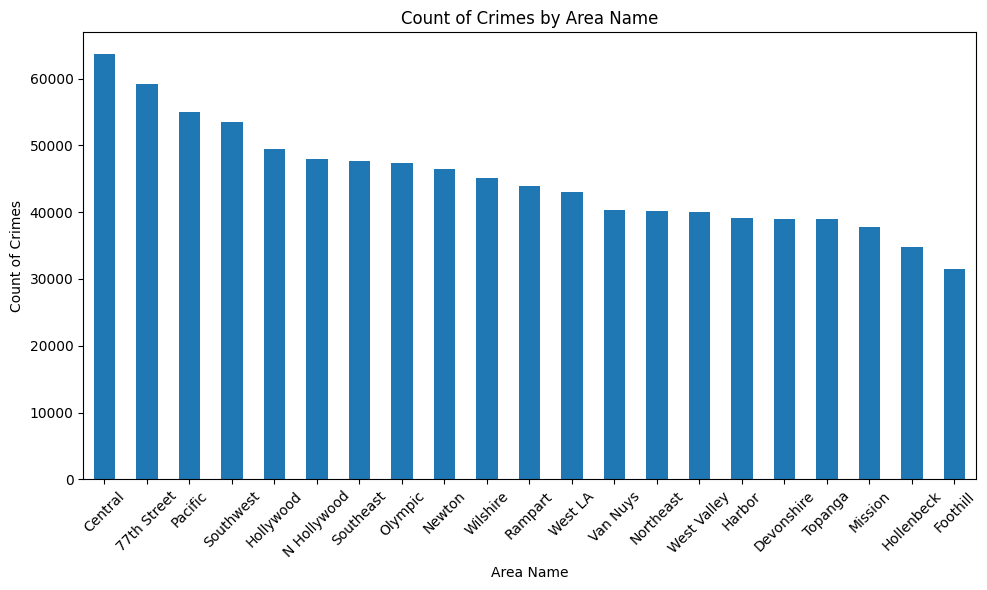

In [68]:
#Plotting a bar plot of count of crimes by Area name. 

area_counts = df_new['Area_Name'].value_counts()

# Plotting the bar plot count of crimes by area
plt.figure(figsize=(10, 6))  #
area_counts.plot(kind='bar')
plt.title('Count of Crimes by Area Name')
plt.xlabel('Area Name')
plt.ylabel('Count of Crimes')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

# Observations
1. Central Los Angeles, 77th street and Pacific have the highest crime rates.

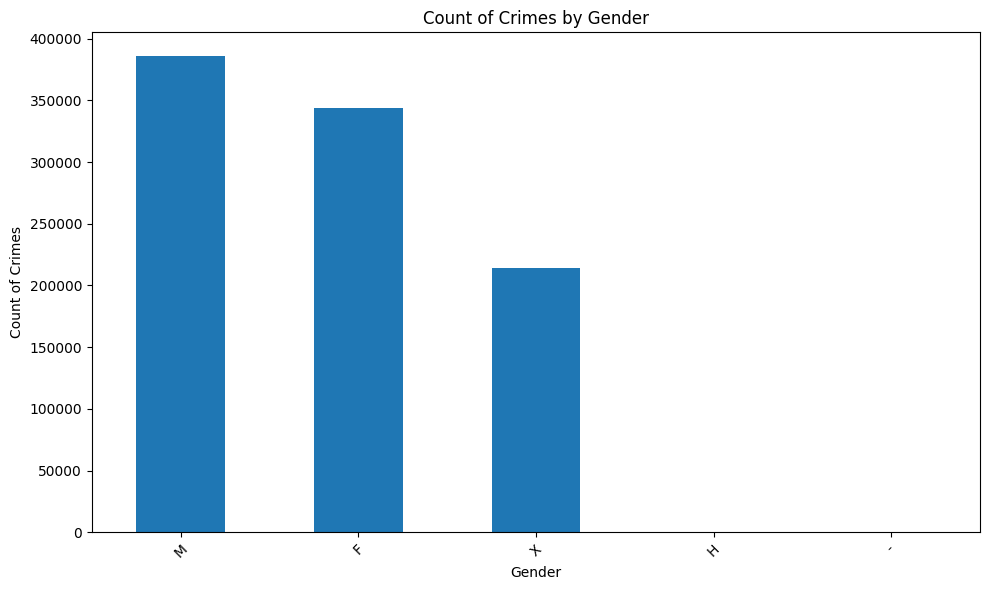

In [69]:
#Plotting a bar graph of gender counts vs count of crimes
gender_counts = df_new['Victim_Sex'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(10, 6))  
gender_counts.plot(kind='bar')
plt.title('Count of Crimes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Crimes')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

# Observations
1. According to the data, more males have been victims of crime than females. 
2. There is also a significant number of victims whose gender was not recorded. 

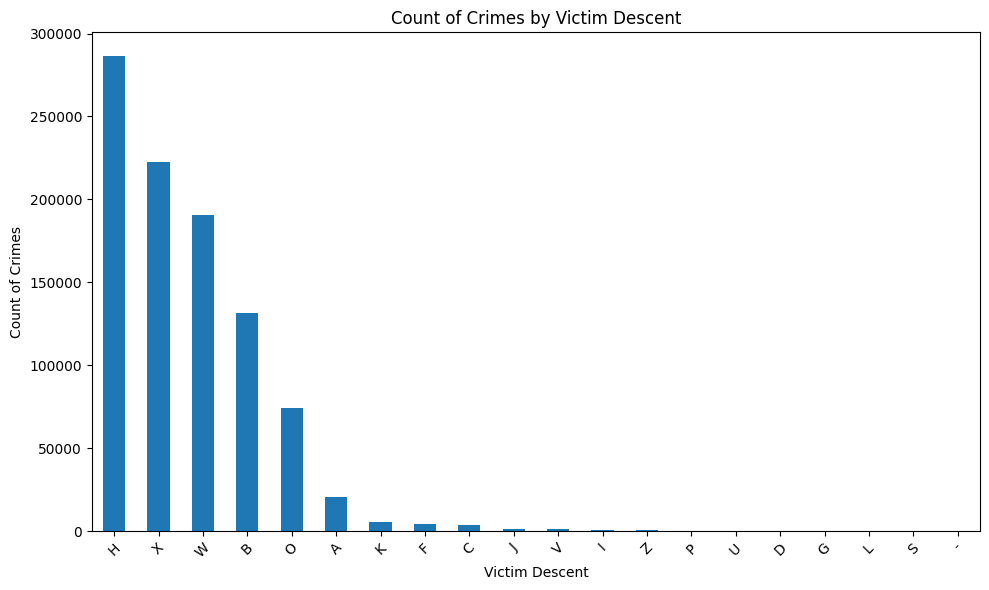

In [70]:
descent_counts = df_new['Victim_Descent'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(10, 6)) 
descent_counts.plot(kind='bar')
plt.title('Count of Crimes by Victim Descent')
plt.xlabel('Victim Descent')
plt.ylabel('Count of Crimes')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

# Observations
1. Hispanic/Latin/Mexicans are the biggest victims of crime, followed by white, then black people. 
2. There is a significant number of people whose descent is not recorded. 
3. Vietnamese, American Indian and Asian Indians have the lowest victim count. 

#### KEY
* A - Other Asian
* B - Black
* C - Chinese
* D - Cambodian
* F - Filipino
* G - Guamanian
* H - Hispanic/Latin/Mexican
* I - American Indian/Alaskan Native
* J - Japanese
* K - Korean
* L - Laotian
* O - Other
* P - Pacific Islander
* S - Samoan
* U - Hawaiian
* V - Vietnamese
* W - White
* X - Unknown
* Z - Asian Indian

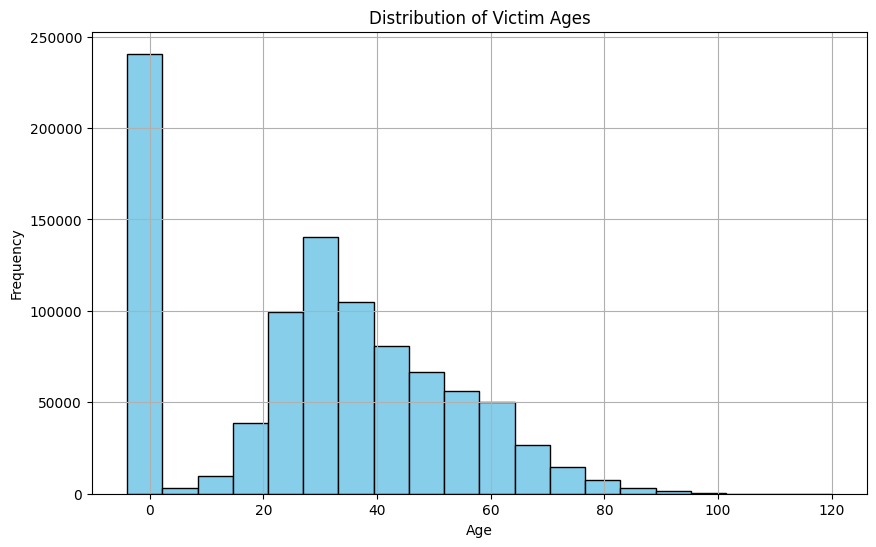

In [71]:
plt.figure(figsize=(10, 6))
plt.hist(df_new['Victim_Age'], bins=20, color='skyblue', edgecolor='black') 
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Observations
1. There is a huge number of victims whose age has been recorded as zero. This needs to be investigated further to establish the types of crimes against age 0

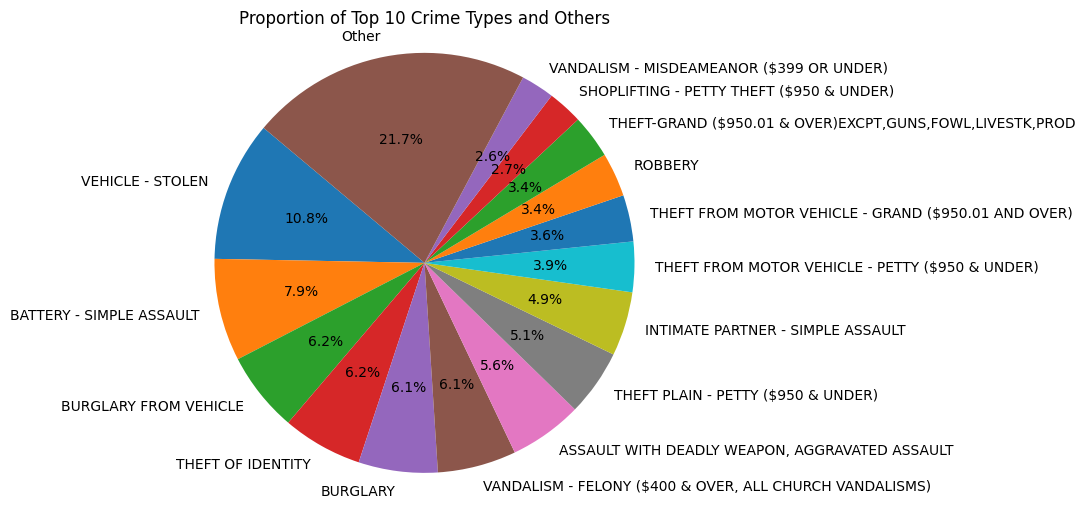

In [72]:

crime_type_counts = df_new['Crime_Description'].value_counts()
top_10_crimes = crime_type_counts.head(15)
other_crimes_count = crime_type_counts[15:].sum()

# Create a DataFrame for the top 10 crimes
crime_counts = pd.DataFrame({'Crime_Description': top_10_crimes.index, 'Count': top_10_crimes.values})

# Add 'Other' row to the DataFrame
crime_counts.loc[len(crime_counts)] = ['Other', other_crimes_count]

# Step 3: Create the Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(crime_counts['Count'], labels=crime_counts['Crime_Description'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Top 10 Crime Types and Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()



# Observation
1. Stolen Vehicles, Battery-Simple Assault, Burglary from a Vehicle and Identity Theft constitute the biggest chunk of crimes. 

In [ ]:
df_new.head()

In [ ]:
#Checking for Outliers in Age 
#Filtering the DataFrame for victims with age zero
age_zero_df = df_new[df_new['Victim_Age'] == 0]